# SLU03 | Visualization with Pandas and Matplotlib: Exercise notebook

## Learning Objectives for Data Visualization

In this exercise notebook, we will explore various data visualization techniques using the "ds_salaries" dataset from https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023. Our main objective is to gain insights if it is worth doing this data science course at all. ;) Therefore we look at the factors that influence data science job salaries and understand the salary trends in the field.

Start by importing these packages:

In [1]:
# for evaluation purposes
import hashlib
import json
import pandas as pd
import numpy as np
import plotchecker
from plotchecker import PlotChecker
import seaborn as sns
import utils

def _hash(s):
    """Function used to hash the answers."""
    return hashlib.sha256(json.dumps(s).encode()).hexdigest()

def get_data(p, ax=0):
    """Gets data from a plot and concatenates it.
    This is necessary for hashing the plot results.
    """
    all_x_data = []
    lines = p.axis.get_lines()
    collections = axis.collections
    if len(lines) > 0:
        all_x_data.append(np.concatenate([x.get_xydata()[:, ax] for x in lines]))
    if len(collections) > 0:
        all_x_data.append(np.concatenate([x.get_offsets()[:, ax] for x in collections]))
    return np.concatenate(all_x_data, axis=0)

In [2]:
# Load the dataset
ds_salaries = pd.read_csv("data/Latest_Data_Science_Salaries.csv")

# Display the first few rows of the modified DataFrame
rows, columns = ds_salaries.shape
print(f'ds_salaries: {rows} records and {columns} fields.');
ds_salaries.head()

ds_salaries: 3300 records and 11 fields.


,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


For these exercises we will use the `matplotlib.pyplot` module. We will start by importing it.

In [3]:
import matplotlib.pyplot as plt

## Exercise 1

To start, you are going to change the default plot settings as follows:
* change the default pyplot chart size to 5 inches width and 5 inches height   
* change the linewidth to 4   
* change the linestyle to be a dash-dot line '-.'

In [4]:
### BEGIN SOLUTION

# Change the default figure size
plt.rcParams["figure.figsize"] = (5, 5)

# Change the default line width
plt.rcParams["lines.linewidth"] = 4

# Change the default line style
plt.rcParams["lines.linestyle"] = '-.'

### END SOLUTION

In [5]:
# Check the default figure size
assert plt.rcParams['figure.figsize'] == [5.0, 5.0], 'Default figure size is incorrect'

# Check the default line width
assert plt.rcParams['lines.linewidth'] == 4, 'Default line width is incorrect'

# Check the default line style
assert plt.rcParams['lines.linestyle'] == '-.', 'Default line style is incorrect'

print('It seems to work! I am curious how it will look like. You too?')

It seems to work! I am curious how it will look like. You too?


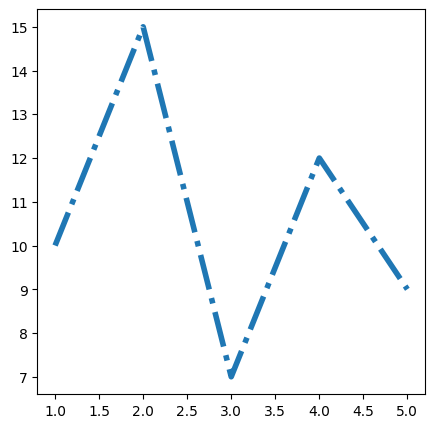

In [6]:
# lets see how those settings look like with the following dataset
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 12, 9]

plt.plot(x,y); # ps.. do you remember the reason why we use ";" ?

## 🛑 Important note about the grading

**Grading plots is difficult**. We are using `plotchecker` to grade the plots with `nbgrader`. For `plotchecker` to work with `nbgrader`, **we need to add in each cell** the line

> **`axis = plt.gca();`**

**after the code required** to do the plot.

**For example**, *if we want to plot a `scatter plot` showing the relationship between **`Company Size`** and **`Salary`**  columns, we would do as follows:*

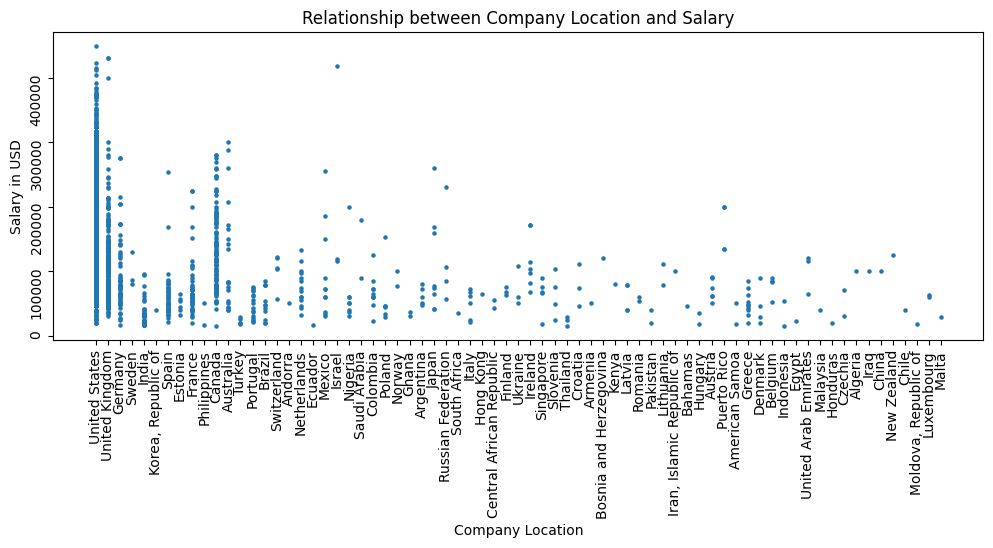

In [7]:
# Create a scatter plot
scatter_plot = ds_salaries.plot.scatter(x='Company Location', y='Salary in USD', s=5, figsize=(12,4))

# Rotate x-axis labels vertically
scatter_plot.axes.tick_params(rotation=90)

# Set labels and title
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.title('Relationship between Company Location and Salary')

# Last line in the cell required to "capture" the cell and grade it with nbgrader
axis = plt.gca();

## Exercise 2

In the above scatter plot we see the salary by geographic location. But I bet there is a much better way to visualise this data. 

A heatmap would be a beautiful way to visualize salary trends by region. But which plot can show best the average salaries for the different locations?

    A. Scatter plot   
    B. Bar plot   
    C. Histogram   
    D. Line plot   
    
Leave your answer below, assigned to the `exercise_2_plot_type` variable as a string. For example:
```
exercise_2_plot_type = 'E'
```

In [8]:
# exercise_2_plot_type =
### BEGIN SOLUTION 

exercise_2_plot_type = 'B'

### END SOLUTION 

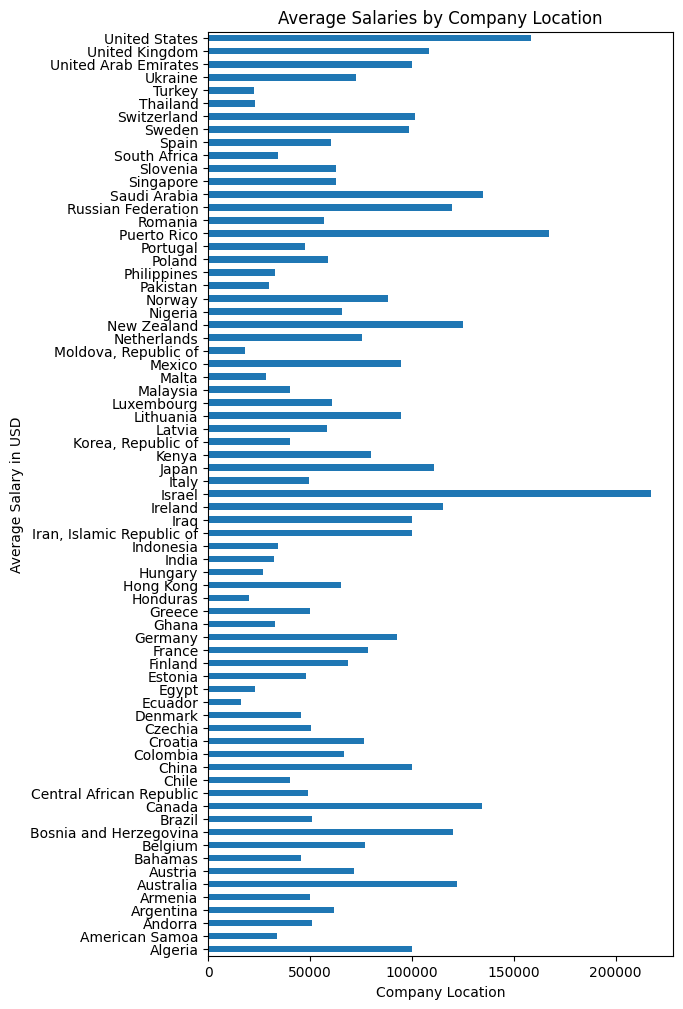

That is correct. Great! Here you can see an example of the plot. We're choosing a horizontal bar plot because Location is a nominal categorical variable.


In [9]:
assert _hash(exercise_2_plot_type) == '955cca1ceba45052d85984d3a2565f4ce25b7488602c60a165598bf80b26e472', 'Try again'

plot = ds_salaries.groupby('Company Location')['Salary in USD'].mean().plot.barh(figsize=(6, 12))
plot.set_xlabel('Company Location')
plot.set_ylabel('Average Salary in USD')
plot.set_title('Average Salaries by Company Location')
plt.show()
    
print("That is correct. Great! Here you can see an example of the plot. We're choosing a horizontal bar plot because Location is a nominal categorical variable.")

You can see that the salaries vary widely between countries. We also have very few data points for most countries. To make meaningful comparisons, we will use just data from United States in the following exercises.

In [10]:
ds_salaries_us = ds_salaries[ds_salaries['Company Location']=='United States']
f'The reduced dataset ds_salaries_us has {ds_salaries_us.shape[0]} rows.'

'The reduced dataset ds_salaries_us has 2495 rows.'

## Exercise 3

Let's explore Salary vs. Expertise in the `ds_salaries_us` dataset. A scatter plot or a line plot is suitable for this purpose. A scatter plot can show the relationship between salary and expertise levels for individual data points. A line plot can help visualize trends in how salaries vary with different levels of expertise. 

The expertise level in the job during the years has the following possible values: 'Junior', 'Intermediate', 'Expert', 'Director'. 

Make a line plot with the following settings:

- set the plot **title** to **`Salary vs Expertise`**.
- label the **x-axis** as **`Expertise Level`**.
- label the **y-axis** as **`Salary`**.

Before plotting, we will reset matplotlib's parameters to the default ones.

In [11]:
plt.style.use('default')

We will calculate the mean salaries for each expertise level for you. The result is stored in the `grouped_by_expertise` dataframe. Use this dataframe for plotting.

In [12]:
grouped_by_expertise = utils.ex_3_dataset(ds_salaries_us)
grouped_by_expertise

,Expertise Level,Salary
0,Junior,100383.981928
1,Intermediate,161106.516199
2,Expert,170067.143184
3,Director,203987.808333


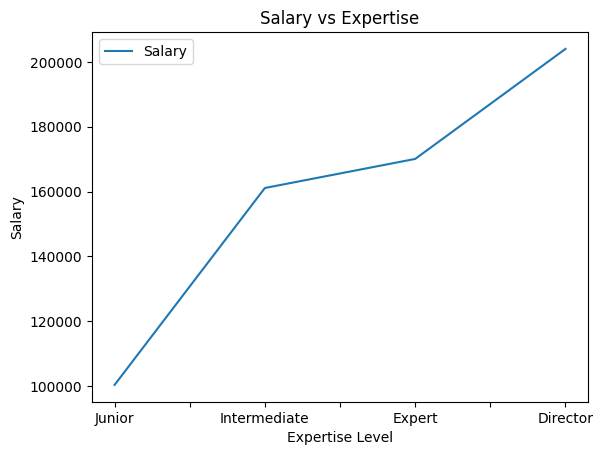

In [13]:
# Create a line plot from the grouped_by_expertise dataframe.

# BEGIN SOLUTION

grouped_by_expertise.plot.line(x='Expertise Level', y='Salary')  # Plot the line chart
#alternatively
#plt.plot(grouped_by_expertise['Expertise Level'], grouped_by_expertise['Salary'],linestyle='-')

plt.xlabel('Expertise Level')  # Set the x-axis label
plt.ylabel('Salary')  # Set the y-axis label
plt.title('Salary vs Expertise')  # Set the plot title

# END SOLUTION

axis = plt.gca();  

In [14]:
pc = PlotChecker(axis)

assert pc.xlabel=='Expertise Level',  "Did you set the correct variables for the plot axes?"
assert pc.ylabel=='Salary',  "Did you set the correct variables for the plot axes?"
assert pc.title=='Salary vs Expertise', 'Did you use the correct plot title?'
assert len([x for x in ['Junior','Intermediate','Expert','Director'] if x in pc.xticklabels])==4, 'Did you plot the correct data?'
assert len(pc.axis.get_lines())==1, 'There should be just one line in the plot.'
assert len([int(round(x,2)==round(p,2)) for x,p in zip(pc.axis.get_lines()[0].get_ydata(),grouped_by_expertise['Salary'])])==4, \
'The data points in the line are not correct.'
assert pc.ylim[0]<=100384, 'Did you use the correct data to plot?'
assert pc.ylim[1]>=203987, 'Did you use the correct data to plot?'
print('Good news! Getting more expertise gets you a better salary.')

Good news! Getting more expertise gets you a better salary.


## Exercise 4

Now we'd like to analyze the salaries by job title. We'd like to see the salary distribution for each job title. Which plot is the best to visualize this?

    A. Box plot  
    B. Line plot   
    C. Histogram   
    D. Bar plot   

In [15]:
#exercise_4_plot_type = ...
### BEGIN SOLUTION 

exercise_4_plot_type = 'A'

### END SOLUTION 

In [16]:
assert _hash(exercise_4_plot_type) == '798640599597df7a8daa32b1132f07850a68b5e71bd295650399a38074f52804', 'Try again.'

print('YES! Indeed, that one is great for this. Lets make one! ')

YES! Indeed, that one is great for this. Lets make one! 


The dataset has 88 job titles, we will analyze just those with more than 10 data points. Here we prepare the dataframe for you:

In [17]:
job_titles = utils.ex_4_dataset(ds_salaries_us)
job_titles.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


Construct this plot with the following parameters:

* Use 'Job Title' and 'Salary' from the `job_titles` dataframe
* set the figure size to 12 inches wide and 6 inches tall
* label x as 'Salary'
* label y as 'Job Title'
* use plot title as 'Salary Distribution by Job Title'
* change the default plot style to ggplot
* make the plot horizontal
* make the figure 12 inches wide and 6 inches high
* use fontsize 9

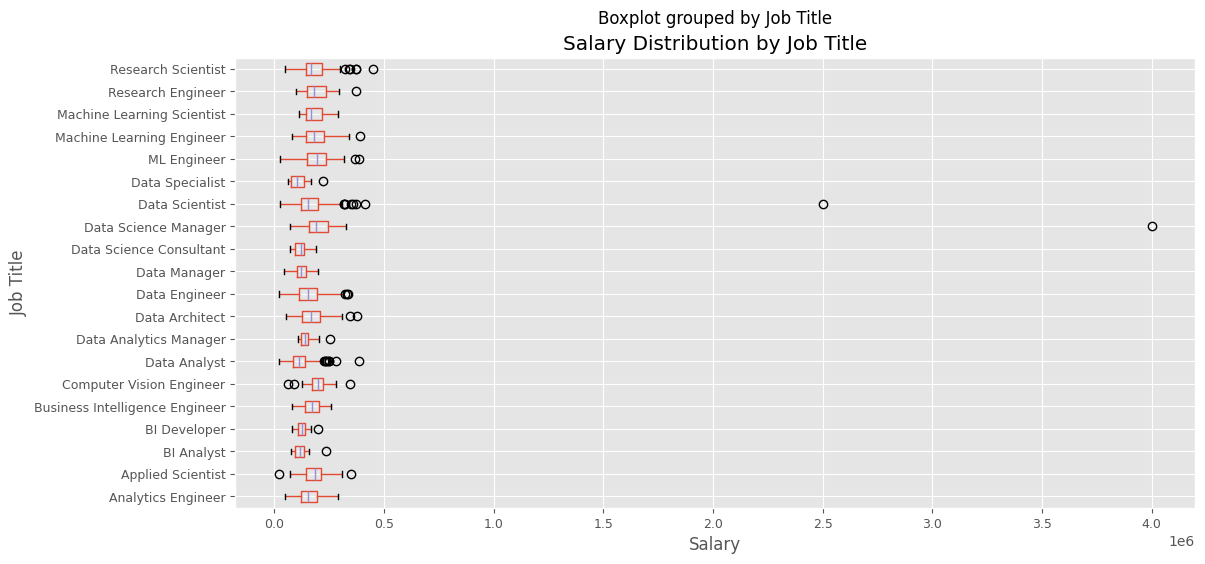

In [18]:
### BEGIN SOLUTION
plt.style.use("ggplot")
data = job_titles[['Job Title', 'Salary']]

# Create the plot
job_titles.boxplot(column="Salary", by="Job Title", vert=False, figsize = (12,6), fontsize=9)
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.title('Salary Distribution by Job Title');

### END SOLUTION

axis = plt.gca(); 

In [19]:
pc = PlotChecker(axis)
assert pc.xlabel == 'Salary', 'Are the axis labels correct?'
assert pc.ylabel == 'Job Title', 'Are the axis labels correct?'
assert pc.title == 'Salary Distribution by Job Title', 'Did you put the correct title?'
assert len([x for x in job_titles['Job Title'].unique() if x in pc.yticklabels])==20, 'Did you use the correct data to plot?'
assert pc.xlim[0]<=job_titles['Salary'].min() and pc.xlim[1]>=job_titles['Salary'].max(), 'Did you use the correct data to plot?'
print('That was AWESOME!! Did you already made up your mind about your jobtitle? Please pay attention to those lost dots btw. We call them outliers and we will get back to that. ')

That was AWESOME!! Did you already made up your mind about your jobtitle? Please pay attention to those lost dots btw. We call them outliers and we will get back to that. 


Now answer the following questions **based on the plot** you just plotted.

1. Which job titles have the two highest lying outliers? Assign the job titles to the list 'highest_outliers'.
2. Which job title has the smallest interquartile range? Assign the job title to the variable 'smallest_IQR'.

In [20]:
#highest_outliers = [...]
#smallest_IQR = ...

### BEGIN SOLUTION
highest_outliers = ['Data Science Manager','Data Scientist']
smallest_IQR = 'BI Developer'
### END SOLUTION

In [21]:
assert _hash(''.join(sorted(highest_outliers)))=='fa7e400b5c3ebb007b055a7153f3ef9f3ce2b4db1025492269b620d6a2c74423', 'Check those outliers again.'
assert _hash(smallest_IQR)=='cdad0c1a0fbac1f4cd00c40a562ce5f62f2a35189d285962c88e6cf6022b20cc', 'What was the interquartile range again? Maybe you should check. ;)'
print('Perfect!')

Perfect!


## Exercise 5

Often we want to check if our assumptions are true. We imagine that some of our variables will be influenced by each other or by the same factors. Which plot is the most useful to help us understand the relationship between two variables?

    A. Box plot   
    B. Scatter plot  
    C. Histogram   
    D. Pie plot

In [22]:
#exercise_5_plot_type = ...
### BEGIN SOLUTION 

exercise_5_plot_type = 'B'

### END SOLUTION 

Yes indeed! It is a great start to use this plot when you want to understand your variables. Here you see how a positive correlation looks like. But no worry if this is new to you, you are going to learn more about this subject later.


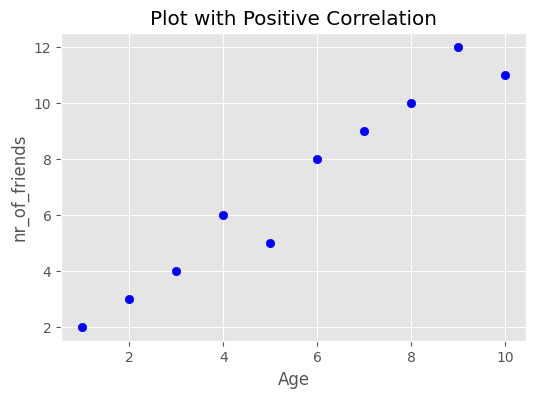

In [23]:
assert _hash(exercise_5_plot_type) == '955cca1ceba45052d85984d3a2565f4ce25b7488602c60a165598bf80b26e472'
, 'Try again'
print('Yes indeed! It is a great start to use this plot when you want to understand your variables. Here you see how a positive correlation looks like. But no worry if this is new to you, you are going to learn more about this subject later.')

# Two variables with a positive correlation
age = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
nr_of_friends = np.array([2, 3, 4, 6, 5, 8, 9, 10, 12, 11])

# Create the plot
plt.figure(figsize=(6, 4))
plt.scatter(age, nr_of_friends, color='b', marker='o')
plt.xlabel('Age')
plt.ylabel('nr_of_friends')
plt.title('Plot with Positive Correlation');


## Exercise 6

We already saw the correlation between `Salary` and `Expertise Level`. Let's make another visualization to show off your skills. We're going to make another bar plot, this time exploring the relationship between `Salary` and `Company Size`.

We will use this dataframe with salary information grouped by company size:

In [24]:
grouped_by_company_size = utils.ex_6_dataset(ds_salaries_us)
grouped_by_company_size

,Company Size,Salary
0,Small,105000.0
1,Medium,152000.0
2,Large,144000.0


Plot a bar plot using the "grouped_by_company_size" dataset and add the following extra information:

- label the **x-axis** as **`Salary (median)`**.
- label the **y-axis** as **`Company Size`**.
- change the **plot color** to **`orange`**.
- name the **title** **`Median Salary by Company Size`**

Choose the appropriate bar plot type (horizontal or vertical) based on the variable type.

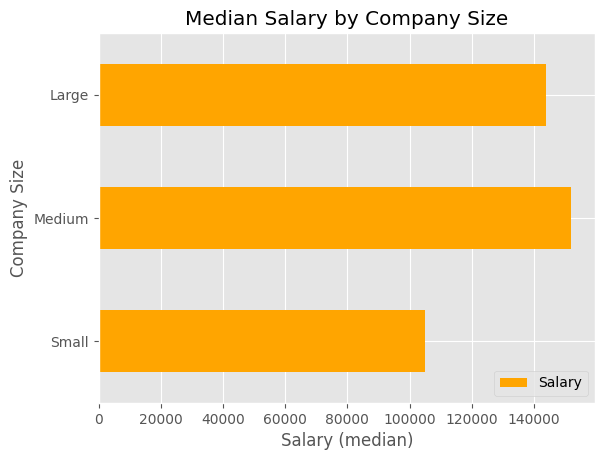

In [25]:
### BEGIN SOLUTION 

# Create a horizontal bar plot
#plt.figure(figsize=(8, 6))
grouped_by_company_size.plot.barh(x='Company Size', y='Salary', color='orange')

# Set labels and title
plt.xlabel('Salary (median)')
plt.ylabel('Company Size')
plt.title('Median Salary by Company Size')


### END SOLUTION 
axis = plt.gca();

In [26]:
pc = PlotChecker(axis)
pc.assert_xlabel_equal('Salary (median)'), "The x label seems wrong"
pc.assert_ylabel_equal('Company Size'), "The y label seems wrong"
pc.assert_title_equal('Median Salary by Company Size'), "Did you put a title for your plot?"
assert len(pc.axis.patches)==3, 'The number of bars in the plot is not correct.'
assert len([int(x.get_width()==s) for x,s in zip(pc.axis.patches,grouped_by_company_size['Salary'])])==3, 'Did you plot the correct dataset in the correct orientation?'
assert pc.axis.patches[0].get_facecolor()==(1.0, 0.6470588235294118, 0.0, 1.0), 'Did you use the correct color?'
assert pc.xlim[0]<=0 and pc.xlim[1]>=grouped_by_company_size['Salary'].max(), 'Did you plot the correct dataset in the correct orientation?'
assert len([x for x in pc.yticklabels if x in ['Small', 'Medium', 'Large']])==3, 'Did you plot the correct dataset in the correct orientation?'
print('That looks beautiful. You are on a roll!')

That looks beautiful. You are on a roll!


## Exercise 7

There is another plot that can tell us a lot about the statistics of the data. These are usually plots that show us the distribution of variables. 

Which plot can we use to visualize how the  **`Salary`** is distributed in a given country?

    A. Box plot   
    B. Bar plot  
    C. Histogram   
    D. Pie plot

In [27]:
#exercise_7_plot_type = ...
### BEGIN SOLUTION 

exercise_7_plot_type = 'C'

### END SOLUTION 

In [28]:
assert _hash(exercise_7_plot_type) == 'c2e8c0cc2e73b9bd1ba9ef1979e73169b471e25b0e9909efe98fde462c0bf55f', 'Try again'
print('--- Success ---')

--- Success ---


Now we're going to use this plot type to visualize the distribution of salaries for different experience levels. All in the same plot! Use the `ds_salaries_us` dataframe. You'll have to check the documentation or google around for this exercise.

- Create a plot with a distribution for each `Experience Level` - sort them in a logical order
- Make each distribution a different color, using the colors ['b', 'g', 'r', 'c']
- Use bin width of 10000
- Define the bin edges from 40000 to 150000
- Normalize the histogram - set `density` to `True`
- Use this formatting:   
    - set the edgecolor to black   
    - set the opacity to 0.7   
- x label should be 'Salary'
- y label should be 'Number of Employees'
- title of the plot should be 'Salary Distribution by Experience Level'
- Add a legend to display the experience levels

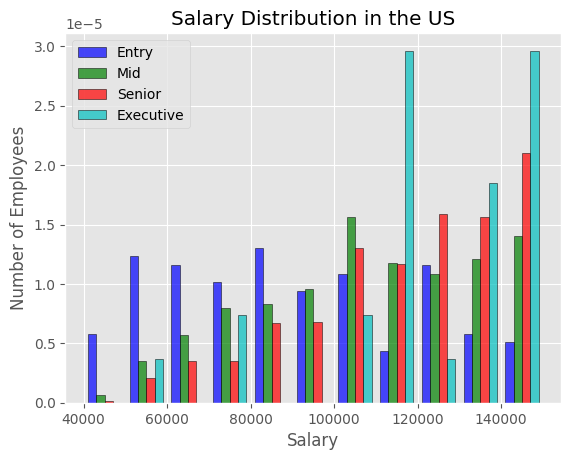

In [29]:
### BEGIN SOLUTION 

# Define the bin edges.
bin_edges = list(range(40000, 150001, 10000))

# Define unique colors for each experience level
experience_levels = ['Entry','Mid','Senior','Executive']
colors = ['b', 'g', 'r', 'c']  

# Create a histogram with different colors for each experience level. 
plt.hist(
    [ds_salaries_us[ds_salaries_us['Experience Level'] == level]['Salary'] for level in experience_levels],
    bins=bin_edges,
    edgecolor='black',
    alpha=0.7,
    color=colors,
    label=experience_levels,
    density=True
)

plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.title('Salary Distribution in the US')
plt.legend()=='Salary Distribution in the US'

### END SOLUTION 
axis = plt.gca();

In [30]:
pc = PlotChecker(axis)
_patches = np.array(pc.axis.patches)
_patches = _patches[np.argsort([p.get_x() for p in _patches])]

assert len(pc.axis.patches)==44, 'The plot does not have the correct number of bins.'
assert pc.ylim[1]>=3e-5 and pc.ylim[1]<=4e-5, 'Did you normalize the plot?'
edge_pos = sorted([(i+n*10)*1000 for i in [41,43,45,47] for n in range(0,11)])
assert sum([int(x.get_x())==e for x,e in zip(_patches,edge_pos)]), 'The bin positions are not correct.'

assert sum([int(x.get_edgecolor()==(0.,0.,0.,.7)) for x in pc.axis.patches])==44, 'The edgecolor or the opacity are not correct.'
assert len([int(x.get_facecolor()==(0.,0.,1.,.7)) for x in _patches[0:44:4]])==11, 'Did you use the correct colors and opacity?'
assert len([int(x.get_facecolor()==(0.,.5,0.,.7)) for x in _patches[1:44:4]])==11, 'Did you use the correct colors and opacity?'
assert len([int(x.get_facecolor()==(1.,0.,0.,.7)) for x in _patches[2:44:4]])==11, 'Did you use the correct colors and opacity?'
assert len([int(x.get_facecolor()==(0.,.75,.75,.7)) for x in _patches[3:44:4]])==11, 'Did you use the correct colors and opacity?'

assert pc.title=='Salary Distribution in the US', 'Did you set the right plot title?'
assert pc.xlabel=='Salary', 'Did you set the xlabel correctly?'
assert pc.ylabel=='Number of Employees', 'Did you set the ylabel correctly?'

print("""          ------ YOU MADE IT !!! CONGRATS !!! WE ARE SUPER PROUD OF YOU !!! --------                                 
Looking at the salary distribution from least to most experienced levels (EN, MI, SE, EX), we would expect that the median salary 
would follow a pattern from left to right, with EN having the lowest median salary, then MI, SE, and finally EX with the highest. 
This pattern is what we can visually observe.However, there is an interesting observation. There is a very high bar for 'SE' (Senior) 
at the highest salary bin. This suggests that there are many employees with 'SE' experience who are receiving salaries similar to those 
of 'EX' (Executive) employees. There are even some Entry and Mid level employees in this bin.
There could be various explanations for this, but for now we only wanted to see the power of visualizing the distribution in a histogram.""")

          ------ YOU MADE IT !!! CONGRATS !!! WE ARE SUPER PROUD OF YOU !!! --------                                 
Looking at the salary distribution from least to most experienced levels (EN, MI, SE, EX), we would expect that the median salary 
would follow a pattern from left to right, with EN having the lowest median salary, then MI, SE, and finally EX with the highest. 
This pattern is what we can visually observe.However, there is an interesting observation. There is a very high bar for 'SE' (Senior) 
at the highest salary bin. This suggests that there are many employees with 'SE' experience who are receiving salaries similar to those 
of 'EX' (Executive) employees. There are even some Entry and Mid level employees in this bin.
There could be various explanations for this, but for now we only wanted to see the power of visualizing the distribution in a histogram.


Now answer this question **based on the plot**:

How many bins are visible in the `Executive` distribution?

In [31]:
#exercise_7_executive_bins = ...
### BEGIN SOLUTION 

exercise_7_executive_bins = 7

### END SOLUTION 

In [32]:
assert _hash(exercise_7_executive_bins) == '7902699be42c8a8e46fbbb4501726517e86b22c56a189f7625a6da49081b2451'
, 'Try again'
print('--- Success ---')

--- Success ---



# 🏁 Ungraded Exercise 🏁
Load the file misterious_data.csv and use data visualization to answer the following questions:

* How is the distribution of **x** in general?
* Are there any **outlier** in any of the fields?
* Which **2 charts** better represent the underlying data?
* Change their **style** to **`bmh`**.
* Add **titles** to each chart explaining them.

In [33]:
data = pd.read_csv('data/misterious_data.csv')
data.head()

,category,x,y
0,1,55.3846,97.1795
1,1,51.5385,96.0256
2,1,46.1538,94.4872
3,1,42.8205,91.4103
4,1,40.7692,88.3333


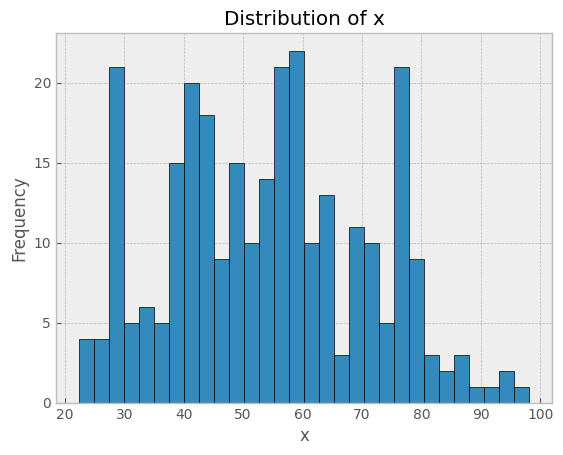

In [34]:
# How is the distribution of x in general?

# Set the plot style to 'bmh'
plt.style.use('bmh')

# Plot the histogram for 'x'
plt.hist(data['x'], bins=30, edgecolor='black')
plt.title('Distribution of x')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()


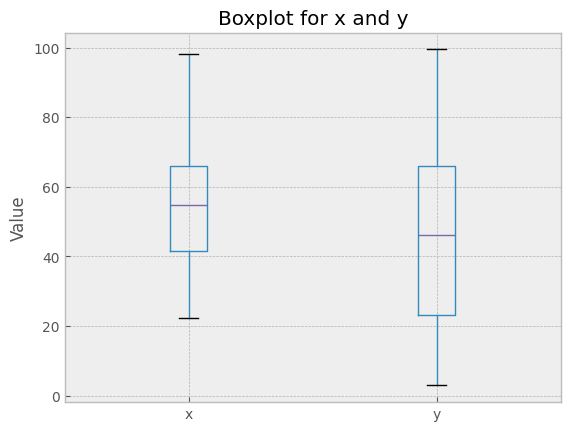

In [35]:
# Are there any outlier in any of the fields?
data.boxplot(column=['x', 'y'])
plt.title('Boxplot for x and y')
plt.ylabel('Value')
plt.show()

In [36]:
"After analyzing the boxplots representing the values of X and Y, no outliers were identified."

'After analyzing the boxplots representing the values of X and Y, no outliers were identified.'

In [37]:
#Which 2 charts better represent the underlying data?

In [38]:
"""
In my opinion, a boxplot provides more information than a histogram, such as quartiles, the IQR, median, and outliers. 
However, it is not ideal for evaluating frequency distribution. 
I think we can combine both plots to obtain all this information in one, as is the case with the violin plot shown below.
"""

'\nIn my opinion, a boxplot provides more information than a histogram, such as quartiles, the IQR, median, and outliers. \nHowever, it is not ideal for evaluating frequency distribution. \nI think we can combine both plots to obtain all this information in one, as is the case with the violin plot shown below.\n'

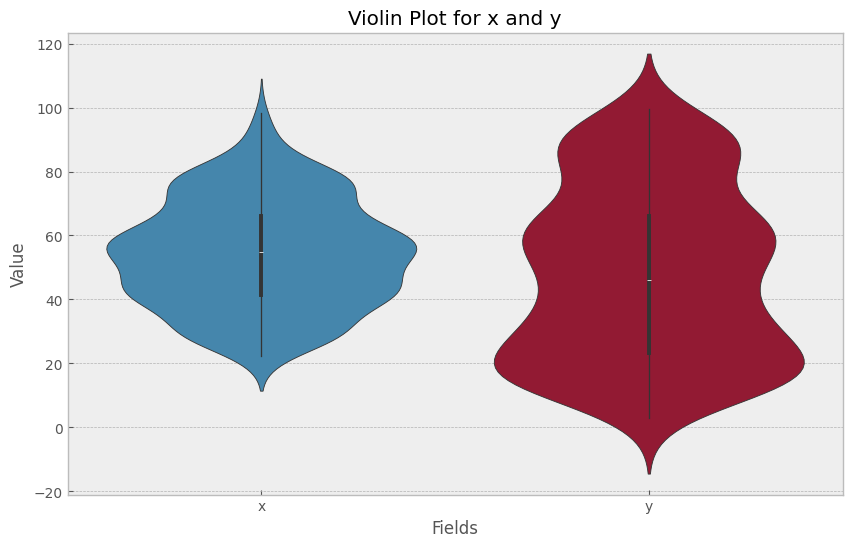

In [39]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data[['x', 'y']])
plt.title('Violin Plot for x and y')
plt.ylabel('Value')
plt.xlabel('Fields')
plt.show()